In [1]:
# created an environment for graph-tool as gt
# had to install pandas in this new environment

from graph_tool.all import *
import pandas as pd

In [2]:
fname = 'dataset/sup3.txt'
dfHSDN = pd.read_csv(fname, sep = '\t')

In [3]:
dfHSDN = dfHSDN[dfHSDN["PubMed occurrence"] >= 1] 
dfHSDN = dfHSDN[dfHSDN["MeSH Symptom Term"]!=dfHSDN["MeSH Disease Term"]]
dfHSDNEdges = dfHSDN.reindex(columns=["MeSH Symptom Term","MeSH Disease Term"])

In [4]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

part0 = dfHSDNEdges['MeSH Symptom Term'].unique()
part1 = dfHSDNEdges['MeSH Disease Term'].unique()

comm = intersection(part0, part1)

dfHSDNEdges = dfHSDNEdges[~dfHSDNEdges['MeSH Symptom Term'].isin(comm)]

dfHSDNEdges_ = dfHSDNEdges.drop_duplicates(subset=["MeSH Symptom Term","MeSH Disease Term"], keep=False)
dfHSDNEdges_

,MeSH Symptom Term,MeSH Disease Term
0,"Aging, Premature",Respiratory Syncytial Virus Infections
1,"Aging, Premature",Orthomyxoviridae Infections
2,"Aging, Premature",HIV Infections
3,"Aging, Premature",Acquired Immunodeficiency Syndrome
4,"Aging, Premature",Breast Neoplasms
...,...,...
147621,Virilism,Growth Disorders
147622,Virilism,Hyperplasia
147623,Virilism,Menstruation Disturbances
147624,Virilism,Amenorrhea


In [5]:
g = Graph()
g.add_edge_list(dfHSDNEdges_.values, hashed = True)
GHSDNBipartite = extract_largest_component(g, directed = False)

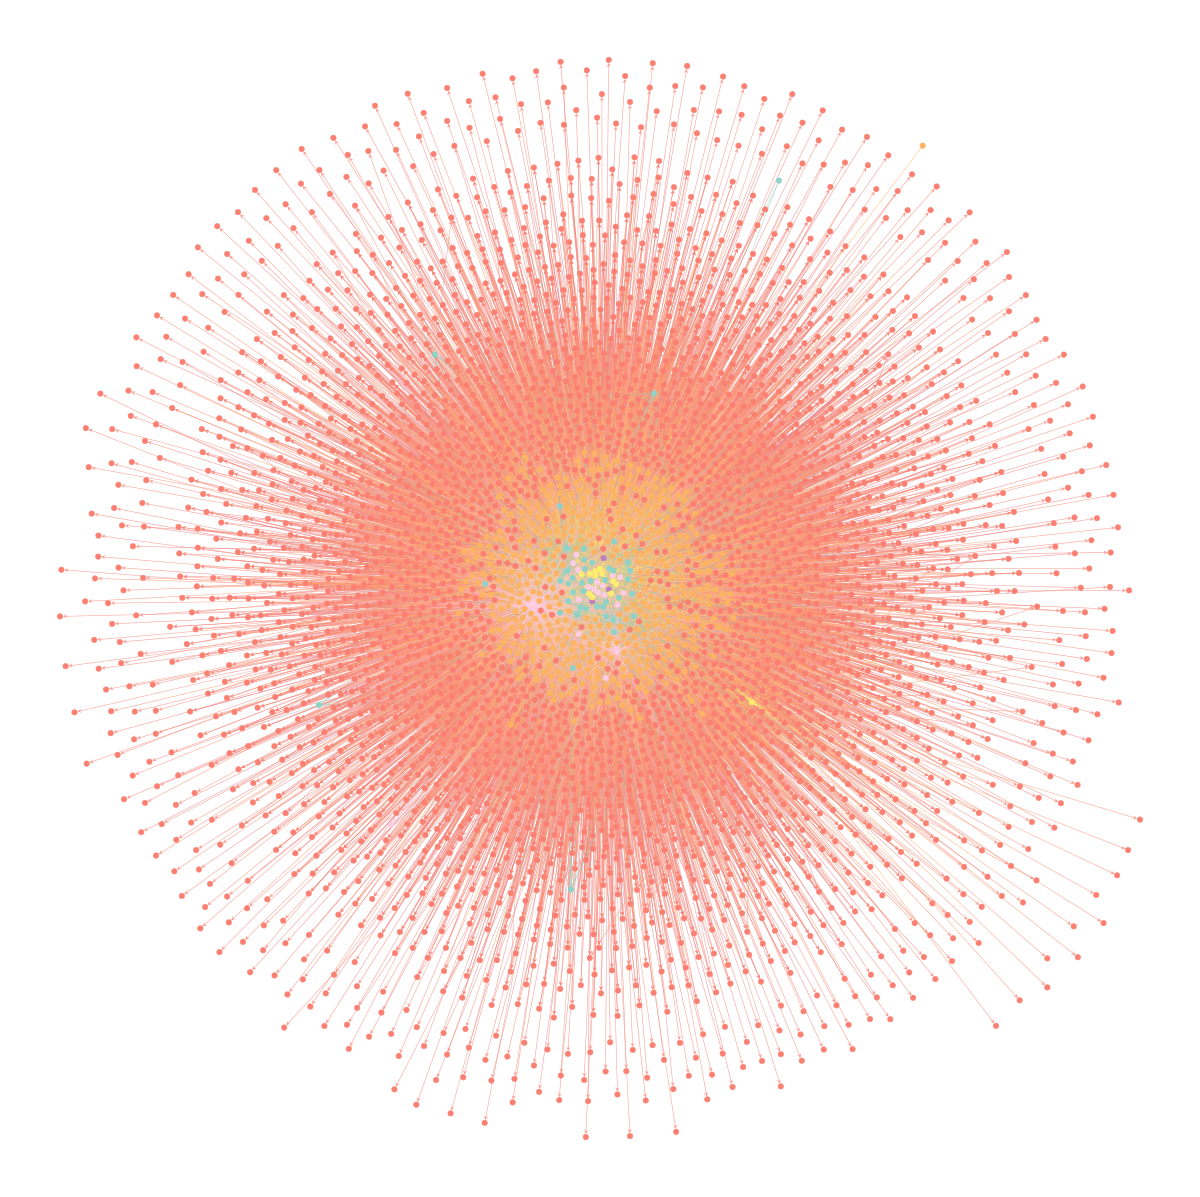

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1d061ae60, at 0x1d061ace0>

In [6]:
state = minimize_blockmodel_dl(g=GHSDNBipartite)
state.draw()